## Lab Lecture 9: Analysis of the population receiving Food Stamps
#### Idea from Kamsey Agu, this was part of her CE 263H_Final Project 

Source: https://geographicdata.science/book/notebooks/10_clustering_and_regionalization.html

In [92]:
#You will need:
!pip install geopandas==0.8.2
!pip install contextily
!pip install cenpy==1.0.1


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


# The next line is importing libraries, takes 1 minute 

In [93]:
import contextily
import geopandas
import cenpy
%matplotlib inline
acs = cenpy.products.ACS(2017)

In [94]:
print(cenpy.__version__)

1.0.1


In [95]:
vars_to_download = {
    "B02001_002E": "total_pop_white",     # Total white population
    "B02001_003E": "total_pop_black",     #Total black population
    "B01003_001E": "total_pop",           # Total population
    "B09019_001E": "hh_total",            # Total households
    "B15003_002E": "total_no_schooling",      # Total number of individuals who have not completed any schooling.
    "B01002_001E": "median_age",          # Median age
    "B19013_001E": "median_hh_income",     # Median household income 
    "B19058_001E": "SNAP_hh",              # Households receiving Food Stamps/SNAP 
    "B08015_001E": "access_to_vehicle"   # Workers over age 16 that drove alone to work by car, van, truck
}
vars_to_download_l = list(vars_to_download.keys())

http://cenpy-devs.github.io/cenpy/generated/cenpy.products.ACS.html

Note that we can add data from county, place, metropolitan statistical area.

Source: http://cenpy-devs.github.io/cenpy/generated/cenpy.products.ACS.html

# The next line is importing data from census, takes 2 mins

In [140]:
# Extracting census variables from Fulton County, GA
db0 = acs.from_county("Fulton, GA",
                  level="tract",
                  variables=vars_to_download_l
                 )

/Users/marta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [141]:
db0.head()

,GEOID,geometry,B01002_001E,B01003_001E,B02001_002E,B02001_003E,B08015_001E,B09019_001E,B15003_002E,B19013_001E,B19058_001E,NAME,state,county,tract
0,13121010512,"POLYGON ((-9412223.140 3972373.180, -9412195.5...",28.3,6497.0,240.0,6061.0,2235.0,6497.0,15.0,30819.0,2472.0,"Census Tract 105.12, Fulton County, Georgia",13,121,010512
1,13121010507,"POLYGON ((-9406193.400 3974540.920, -9406083.6...",28.7,8190.0,348.0,7415.0,2340.0,8190.0,0.0,39190.0,2694.0,"Census Tract 105.07, Fulton County, Georgia",13,121,010507
2,13121007602,"POLYGON ((-9403922.150 3989267.210, -9403919.5...",46.0,2737.0,33.0,2671.0,850.0,2737.0,29.0,34136.0,1026.0,"Census Tract 76.02, Fulton County, Georgia",13,121,007602
3,13121008700,"POLYGON ((-9406355.710 4002622.120, -9406227.9...",33.4,5178.0,465.0,4699.0,1490.0,5178.0,96.0,29583.0,2362.0,"Census Tract 87, Fulton County, Georgia",13,121,008700
4,13121004100,"POLYGON ((-9399514.680 3994330.190, -9399403.0...",30.8,2127.0,154.0,1931.0,605.0,2127.0,21.0,38519.0,662.0,"Census Tract 41, Fulton County, Georgia",13,121,004100


In [142]:
db0.shape ##number of rows gives the number of tracts extracted

(204, 15)

In [143]:
## Droping rows with NA fields
#db.loc[:,vars_to_download].dropna(axis=0)
db = db0.dropna(axis=0)

In [144]:
db.describe()

,B01002_001E,B01003_001E,B02001_002E,B02001_003E,B08015_001E,B09019_001E,B15003_002E,B19013_001E,B19058_001E
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.00000,201.000000
mean,36.058706,5013.880597,2259.756219,2211.144279,1851.243781,5013.880597,24.497512,67063.99005,1948.955224
std,6.665083,2948.400801,2157.234288,2614.447923,1263.544200,2948.400801,30.528859,42621.31102,1081.882837
min,12.400000,1075.000000,0.000000,29.000000,200.000000,1075.000000,0.000000,9815.00000,171.000000
25%,32.400000,2645.000000,263.000000,558.000000,810.000000,2645.000000,0.000000,31192.00000,1104.000000
50%,35.400000,4478.000000,1857.000000,1369.000000,1630.000000,4478.000000,16.000000,56991.00000,1844.000000
75%,40.300000,6282.000000,3834.000000,2491.000000,2510.000000,6282.000000,33.000000,93580.00000,2615.000000
max,54.800000,17958.000000,12255.000000,16075.000000,6555.000000,17958.000000,196.000000,200179.00000,6228.000000


In [100]:
##Option fill NA with column mean
#filler = lambda col: col.fillna(col.mean())
#db.loc[:, vars_to_download] = db.loc[:, vars_to_download]\
#                                .apply(filler)

## Rename columns with intuitive names

In [145]:
db = db.rename(columns=vars_to_download)

In [146]:
db.head()

,GEOID,geometry,median_age,total_pop,total_pop_white,total_pop_black,access_to_vehicle,hh_total,total_no_schooling,median_hh_income,SNAP_hh,NAME,state,county,tract
0,13121010512,"POLYGON ((-9412223.140 3972373.180, -9412195.5...",28.3,6497.0,240.0,6061.0,2235.0,6497.0,15.0,30819.0,2472.0,"Census Tract 105.12, Fulton County, Georgia",13,121,010512
1,13121010507,"POLYGON ((-9406193.400 3974540.920, -9406083.6...",28.7,8190.0,348.0,7415.0,2340.0,8190.0,0.0,39190.0,2694.0,"Census Tract 105.07, Fulton County, Georgia",13,121,010507
2,13121007602,"POLYGON ((-9403922.150 3989267.210, -9403919.5...",46.0,2737.0,33.0,2671.0,850.0,2737.0,29.0,34136.0,1026.0,"Census Tract 76.02, Fulton County, Georgia",13,121,007602
3,13121008700,"POLYGON ((-9406355.710 4002622.120, -9406227.9...",33.4,5178.0,465.0,4699.0,1490.0,5178.0,96.0,29583.0,2362.0,"Census Tract 87, Fulton County, Georgia",13,121,008700
4,13121004100,"POLYGON ((-9399514.680 3994330.190, -9399403.0...",30.8,2127.0,154.0,1931.0,605.0,2127.0,21.0,38519.0,662.0,"Census Tract 41, Fulton County, Georgia",13,121,004100


In [147]:
db.shape

(201, 15)

## Calculates areas, and percentages

In [148]:
db["area_sqkm"] = db.to_crs(epsg=5070).area / 1e6

In [149]:
db["pct_no_schooling"] = db["total_no_schooling"] / \
                  (db["total_pop"] + \
                   (db["total_pop"]==0) * 1
                  )

In [150]:
db["pct_black"] = db["total_pop_black"] / \
                  (db["total_pop"] + \
                   (db["total_pop"]==0) * 1
                  )

In [151]:
db["pct_white"] = db["total_pop_white"] / \
                  (db["total_pop"] + \
                   (db["total_pop"]==0) * 1
                  )

In [152]:
db["pct_SNAP"] = db["SNAP_hh"] / \
                  (db["hh_total"] + \
                   (db["hh_total"]==0) * 1
                  )

In [153]:
db.head()  ##shows the new names and the new columns

,GEOID,geometry,median_age,total_pop,total_pop_white,total_pop_black,access_to_vehicle,hh_total,total_no_schooling,median_hh_income,SNAP_hh,NAME,state,county,tract,area_sqkm,pct_no_schooling,pct_black,pct_white,pct_SNAP
0,13121010512,"POLYGON ((-9412223.140 3972373.180, -9412195.5...",28.3,6497.0,240.0,6061.0,2235.0,6497.0,15.0,30819.0,2472.0,"Census Tract 105.12, Fulton County, Georgia",13,121,010512,9.250028,0.002309,0.932892,0.036940,0.380483
1,13121010507,"POLYGON ((-9406193.400 3974540.920, -9406083.6...",28.7,8190.0,348.0,7415.0,2340.0,8190.0,0.0,39190.0,2694.0,"Census Tract 105.07, Fulton County, Georgia",13,121,010507,6.944902,0.000000,0.905372,0.042491,0.328938
2,13121007602,"POLYGON ((-9403922.150 3989267.210, -9403919.5...",46.0,2737.0,33.0,2671.0,850.0,2737.0,29.0,34136.0,1026.0,"Census Tract 76.02, Fulton County, Georgia",13,121,007602,3.369943,0.010596,0.975886,0.012057,0.374863
3,13121008700,"POLYGON ((-9406355.710 4002622.120, -9406227.9...",33.4,5178.0,465.0,4699.0,1490.0,5178.0,96.0,29583.0,2362.0,"Census Tract 87, Fulton County, Georgia",13,121,008700,7.761980,0.018540,0.907493,0.089803,0.456161
4,13121004100,"POLYGON ((-9399514.680 3994330.190, -9399403.0...",30.8,2127.0,154.0,1931.0,605.0,2127.0,21.0,38519.0,662.0,"Census Tract 41, Fulton County, Georgia",13,121,004100,1.265632,0.009873,0.907851,0.072402,0.311236


In [155]:
db.describe() ### Calculates the statistics of the variables

,median_age,total_pop,total_pop_white,total_pop_black,access_to_vehicle,hh_total,total_no_schooling,median_hh_income,SNAP_hh,area_sqkm,pct_no_schooling,pct_black,pct_white,pct_SNAP
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,36.058706,5013.880597,2259.756219,2211.144279,1851.243781,5013.880597,24.497512,67063.99005,1948.955224,6.868056,0.005617,0.475436,0.430139,0.399654
std,6.665083,2948.400801,2157.234288,2614.447923,1263.544200,2948.400801,30.528859,42621.31102,1081.882837,15.799895,0.006590,0.370279,0.328201,0.096834
min,12.400000,1075.000000,0.000000,29.000000,200.000000,1075.000000,0.000000,9815.00000,171.000000,0.393121,0.000000,0.008635,0.000000,0.041799
25%,32.400000,2645.000000,263.000000,558.000000,810.000000,2645.000000,0.000000,31192.00000,1104.000000,1.507334,0.000000,0.115736,0.069287,0.336959
50%,35.400000,4478.000000,1857.000000,1369.000000,1630.000000,4478.000000,16.000000,56991.00000,1844.000000,3.369943,0.004020,0.350531,0.477724,0.387755
75%,40.300000,6282.000000,3834.000000,2491.000000,2510.000000,6282.000000,33.000000,93580.00000,2615.000000,6.913723,0.008037,0.905372,0.735767,0.447165
max,54.800000,17958.000000,12255.000000,16075.000000,6555.000000,17958.000000,196.000000,200179.00000,6228.000000,185.117094,0.034422,0.990776,0.975895,0.711181


In [156]:
! rm -f atlanta_tracts.gpkg 
db.to_file("atlanta.gpkg", driver="GPKG")  ### Saves data in gpkg format

/Users/marta/opt/anaconda3/lib/python3.9/site-packages/geopandas/io/file.py:234: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


## After you save atlanta_tracts.gpkg you can start the code here

In [157]:
db = geopandas.read_file('atlanta.gpkg')
db.columns

Index(['GEOID', 'median_age', 'total_pop', 'total_pop_white',
       'total_pop_black', 'access_to_vehicle', 'hh_total',
       'total_no_schooling', 'median_hh_income', 'SNAP_hh', 'NAME', 'state',
       'county', 'tract', 'area_sqkm', 'pct_no_schooling', 'pct_black',
       'pct_white', 'pct_SNAP', 'geometry'],
      dtype='object')

In [158]:
db.head()  ##shows the new names and the new columns

,GEOID,median_age,total_pop,total_pop_white,total_pop_black,access_to_vehicle,hh_total,total_no_schooling,median_hh_income,SNAP_hh,NAME,state,county,tract,area_sqkm,pct_no_schooling,pct_black,pct_white,pct_SNAP,geometry
0,13121010512,28.3,6497.0,240.0,6061.0,2235.0,6497.0,15.0,30819.0,2472.0,"Census Tract 105.12, Fulton County, Georgia",13,121,010512,9.250028,0.002309,0.932892,0.036940,0.380483,"POLYGON ((-9412223.140 3972373.180, -9412195.5..."
1,13121010507,28.7,8190.0,348.0,7415.0,2340.0,8190.0,0.0,39190.0,2694.0,"Census Tract 105.07, Fulton County, Georgia",13,121,010507,6.944902,0.000000,0.905372,0.042491,0.328938,"POLYGON ((-9406193.400 3974540.920, -9406083.6..."
2,13121007602,46.0,2737.0,33.0,2671.0,850.0,2737.0,29.0,34136.0,1026.0,"Census Tract 76.02, Fulton County, Georgia",13,121,007602,3.369943,0.010596,0.975886,0.012057,0.374863,"POLYGON ((-9403922.150 3989267.210, -9403919.5..."
3,13121008700,33.4,5178.0,465.0,4699.0,1490.0,5178.0,96.0,29583.0,2362.0,"Census Tract 87, Fulton County, Georgia",13,121,008700,7.761980,0.018540,0.907493,0.089803,0.456161,"POLYGON ((-9406355.710 4002622.120, -9406227.9..."
4,13121004100,30.8,2127.0,154.0,1931.0,605.0,2127.0,21.0,38519.0,662.0,"Census Tract 41, Fulton County, Georgia",13,121,004100,1.265632,0.009873,0.907851,0.072402,0.311236,"POLYGON ((-9399514.680 3994330.190, -9399403.0..."


In [159]:
db.shape

(201, 20)

## Kmeans Clustering (Elbow Method and Silhouette Scores)

In [160]:
pip install seaborn  #Package for plot styles


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [161]:
import libpysal.weights.set_operations as Wsets
from libpysal.weights import Queen, KNN
import seaborn 
import pandas as pd
import geopandas 
import numpy
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
pip install mapclassify


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Here we select the variables to analyze

In [163]:
cluster_variables =  [
    'pct_white',          # Percent of tract population that is white
    'pct_black',          # Percent of tract population that is black
    'pct_no_schooling',       # Percent of tract population with no schooling
    'pct_SNAP',
    'median_age',         # Median age of tract population
    'median_hh_income'    # Median household income
]

/Users/marta/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/marta/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices 

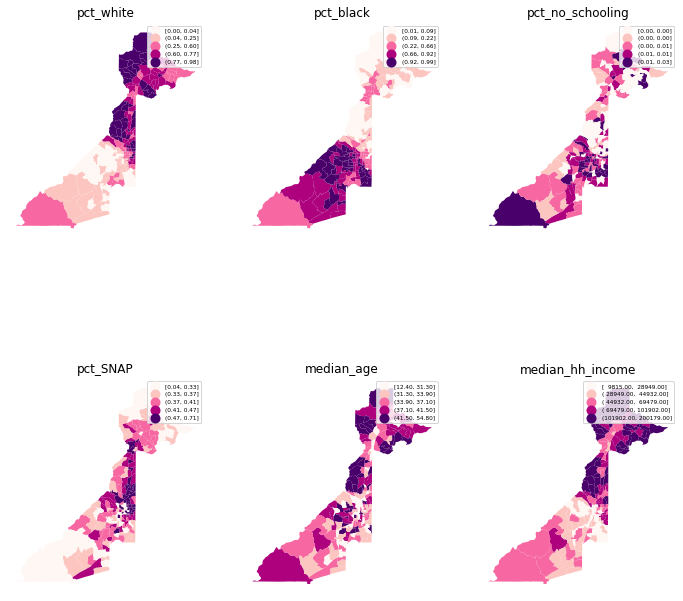

In [345]:
f, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(cluster_variables):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    db.plot(column=col, ax=ax, scheme='Quantiles', 
            linewidth=0, cmap='RdPu',legend=True,legend_kwds={'fontsize':'xx-small'})
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

## Measuring spatial autocorrelations

In [165]:
w = Queen.from_dataframe(db)

In [166]:
w.islands

[]

In [167]:
from pylab import rcParams
import numpy as np
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

## MEASURING VARIABLE CORRELATIONS

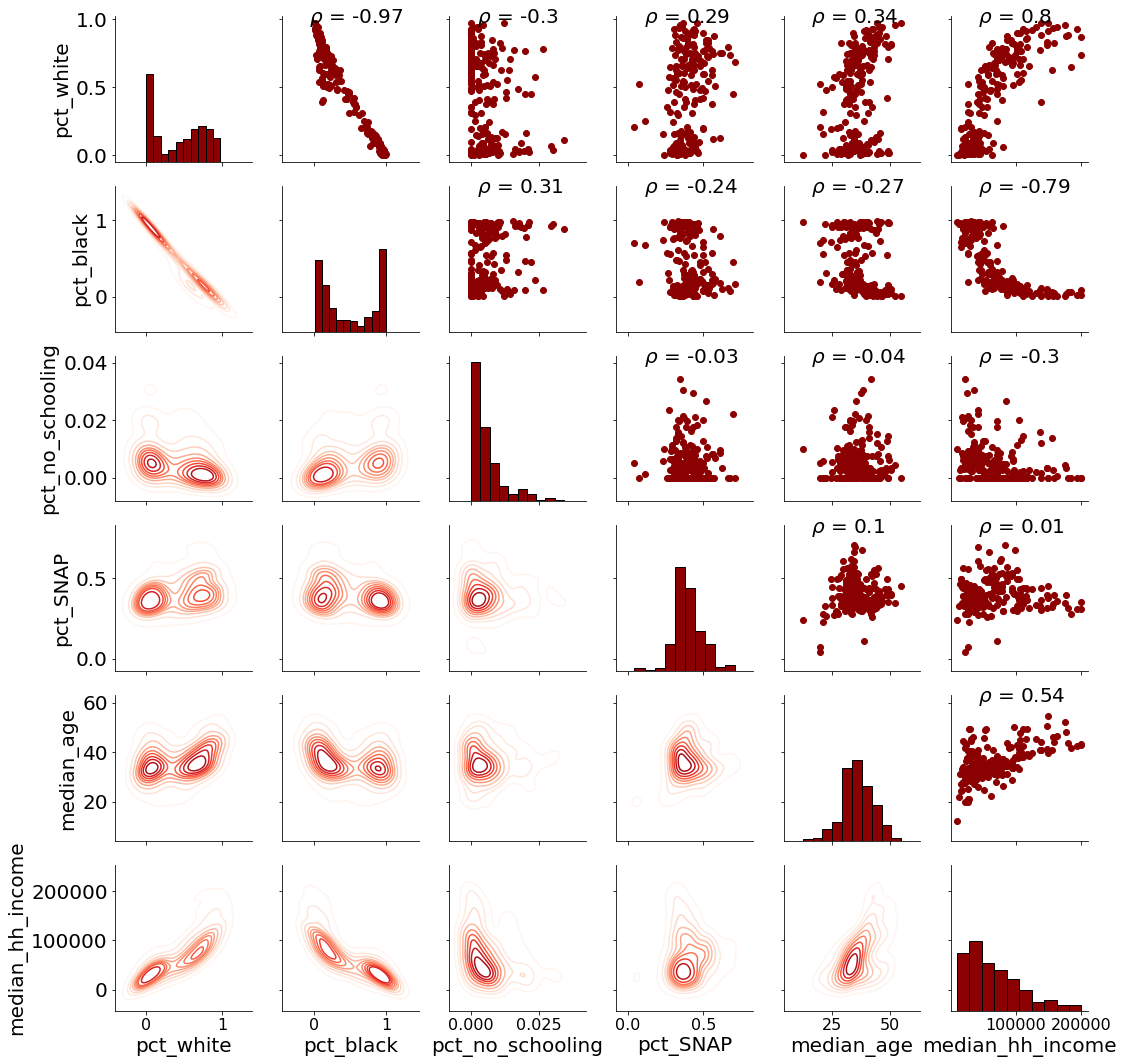

In [168]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)


grid = seaborn.PairGrid(db[cluster_variables])
# Map the plots to the locations

grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(seaborn.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');
mpl.rcParams["axes.labelsize"] = 20
mpl.rcParams["xtick.labelsize"] = 16
mpl.rcParams["ytick.labelsize"] = 20
plt.savefig('PairGrid.png')
plt.show()

## ELBOW METHOD

In [232]:
robust_scale(db[cluster_variables])

array([[-0.66136169,  0.73750541, -0.21296278, -0.06598373, -0.89873418,
        -0.41950375],
       [-0.65303328,  0.70265431, -0.50023338, -0.53370394, -0.84810127,
        -0.28532731],
       [-0.69869684,  0.79195312,  0.81813259, -0.11698196,  1.34177215,
        -0.36633647],
       ...,
       [ 0.10162357,  0.        , -0.16997068, -0.20680906, -0.51898734,
        -0.20979996],
       [ 0.04203776, -0.29451916,  0.10595056, -0.31558909, -0.5443038 ,
         0.37632237],
       [ 0.08840856, -0.36923145, -0.50023338, -0.20307614,  0.7721519 ,
         0.75612297]])

In [234]:
from sklearn.preprocessing import robust_scale, scale

db_scaled = scale(db[cluster_variables]) 

Sum_of_squared_distances = []
K = range(1,7)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(db_scaled)
    Sum_of_squared_distances.append(km.inertia_)

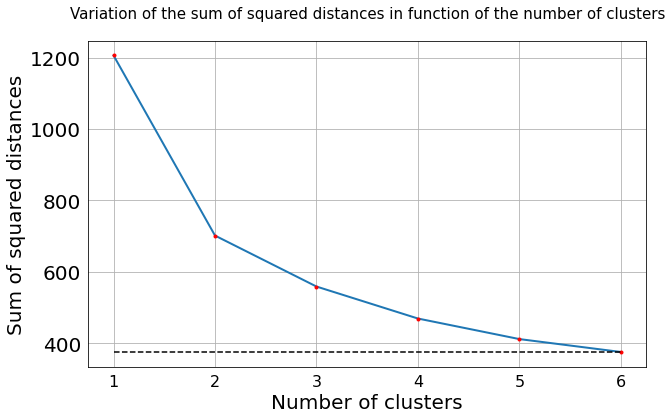

In [236]:
plt.figure(figsize = (10,6))
ax = plt.gca()
plt.plot(K, Sum_of_squared_distances, linewidth = 2)
plt.plot(K, Sum_of_squared_distances, '.', c='r',markersize = 6)
plt.plot(K,[Sum_of_squared_distances[-1] for i in range(len(Sum_of_squared_distances))],'--',
         linewidth = 1.5, c = 'black')

plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('Sum of squared distances', fontsize = 20)
plt.title('Variation of the sum of squared distances in function of the number of clusters', fontsize = 15, y = 1.05)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
#plt.xticks(np.arange(1, 21, step=1))
ax.grid(True)
plt.show()

In [238]:
# Initialising KMeans instance
kmeans = KMeans(n_clusters=4)

In [240]:
numpy.random.seed(12)
# Running K-Means algorithm
k4cls = kmeans.fit(db_scaled)

In [211]:
k4cls.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 0, 1, 1, 2, 3, 1, 1, 1, 3, 1,
       1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3, 2, 0, 0, 2, 1,
       1, 1, 2, 0, 1, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 2, 2, 2,
       2, 2, 1, 1, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 1, 1, 0, 1,
       1, 1, 1, 2, 3, 0, 0, 2, 2, 2, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 1, 1, 2, 2, 1, 3, 3,
       3, 3, 2, 3, 3, 1, 1, 1, 2, 0, 0, 1, 1, 2, 0, 2, 2, 1, 0, 2, 0, 1,
       3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 0, 0, 1, 1, 0,
       2, 2, 0, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 2, 1, 3, 1, 2, 1, 2, 2,
       3, 1, 2], dtype=int32)

In [241]:
k4cls.cluster_centers_

array([[-0.96252053,  0.97428594, -0.13155439, -0.4670253 , -0.33606877,
        -0.76117931],
       [ 0.71295483, -0.73721665, -0.32835651,  0.83446686, -0.27280005,
         0.12786523],
       [ 1.10175641, -1.10380396, -0.41297918, -0.38535412,  1.06158959,
         1.56122669],
       [-0.66545035,  0.69516489,  2.25275044,  0.12118263, -0.09549501,
        -0.66054517]])

In [242]:
k4cls.inertia_

469.5869281318978

In [243]:
k4cls.n_iter_

5

/Users/marta/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


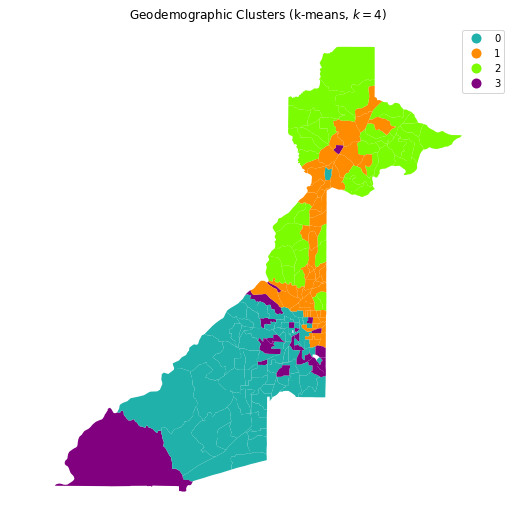

In [245]:
# Visualising clusters on the map

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cmapTrial = ListedColormap(["lightseagreen", "darkorange", "lawngreen", "purple"])
db['k4cls'] = k4cls.labels_
f, ax = plt.subplots(1, figsize=(9, 9))
db.plot(column='k4cls', cmap=cmapTrial, categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.title(r'Geodemographic Clusters (k-means, $k=4$)')
plt.show()

In [246]:
# Grouping data table by cluster label and count observations
k4sizes = db.groupby('k4cls').size()
k4sizes


k4cls
0    78
1    60
2    42
3    21
dtype: int64

In [247]:
db.shape

(201, 21)

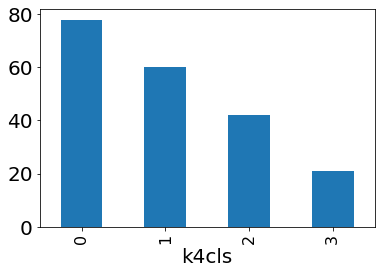

In [248]:
# cardinality
_ = k4sizes.plot.bar()

In [249]:
# Dissolve areas by Cluster, aggregate by summing, and keep column for area
areas = db.dissolve(by='k4cls', aggfunc='sum')['area_sqkm']
areas

/Users/marta/opt/anaconda3/lib/python3.9/site-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


k4cls
0    563.820364
1    195.716276
2    389.580768
3    231.361902
Name: area_sqkm, dtype: float64

<AxesSubplot:xlabel='k4cls'>

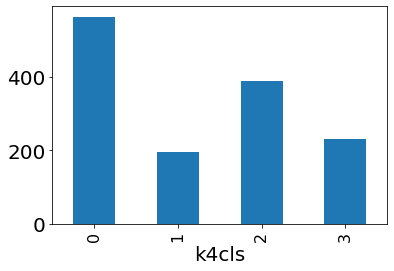

In [250]:
areas.plot.bar() #Area per cluster

In [251]:
areas[0]/areas.sum() #area cluster 0

0.40842362517099445

In [252]:
# Grouping table by cluster label
k4means = db.groupby('k4cls')[cluster_variables].mean()
k4means.T.round(3)

k4cls,0,1,2,3
pct_white,0.115,0.664,0.791,0.212
pct_black,0.835,0.203,0.068,0.732
pct_no_schooling,0.005,0.003,0.003,0.020
pct_SNAP,0.355,0.480,0.362,0.411
median_age,33.824,34.245,43.117,35.424
median_hh_income,34702.333,72500.200,133439.786,38980.810


In [253]:
# Grouping table by cluster label, keep the variables used for clustering, and obtaining their descriptive summary
k4desc = db.groupby('k4cls')[cluster_variables].describe()
for cluster in k4desc.T:
    print('\n\t---------\n\tCluster %i'%cluster)
    print(k4desc.T[cluster].unstack())


	---------
	Cluster 0
                  count          mean           std          min  \
pct_white          78.0      0.115025      0.125935     0.000000   
pct_black          78.0      0.835295      0.166341     0.191483   
pct_no_schooling   78.0      0.004753      0.003303     0.000000   
pct_SNAP           78.0      0.354543      0.083756     0.041799   
median_age         78.0     33.824359      7.130476    12.400000   
median_hh_income   78.0  34702.333333  14066.824062  9815.000000   

                           25%           50%           75%           max  
pct_white             0.021616      0.062827      0.163517      0.522292  
pct_black             0.769771      0.907714      0.950208      0.982610  
pct_no_schooling      0.002362      0.004802      0.006797      0.012458  
pct_SNAP              0.325437      0.354564      0.401030      0.562844  
median_age           30.125000     33.650000     38.025000     49.400000  
median_hh_income  25882.000000  30895.500000  4354

In [398]:
# Index db on cluster ID
tidy_db = db.set_index('k4cls')
tidy_db = tidy_db[cluster_variables]
tidy_db = tidy_db.stack()
tidy_db = tidy_db.reset_index()
tidy_db = tidy_db.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
tidy_db

,k4cls,Attribute,Values
0,0,pct_white,0.036940
1,0,pct_black,0.932892
2,0,pct_no_schooling,0.002309
3,0,pct_SNAP,0.380483
4,0,median_age,28.300000
...,...,...,...
1201,2,pct_black,0.058972
1202,2,pct_no_schooling,0.000000
1203,2,pct_SNAP,0.365375
1204,2,median_age,41.500000


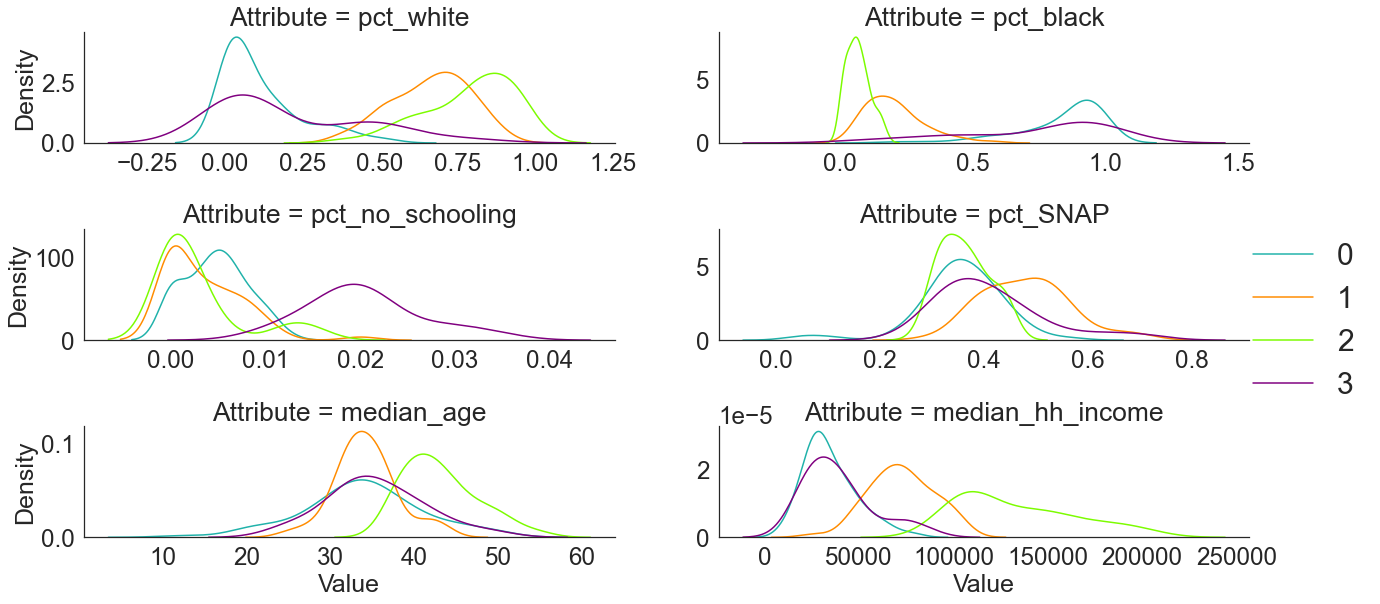

In [394]:
# Setup the facets
seaborn.set(font_scale=2.2) 
seaborn. set_style(style='white')
color = {0:"lightseagreen", 1:"darkorange", 2:"lawngreen", 3:"purple"}
facets = seaborn.FacetGrid(data=tidy_db, col='Attribute', palette=color, hue='k4cls', \
                  sharey=False, sharex=False, aspect=3, col_wrap=2)
_ = facets.map(seaborn.kdeplot, 'Values', shade=False).add_legend(fontsize=30)
facets.legend.set_title(' ')
facets.set_axis_labels("Value","Density",fontsize=25)

## PCA ANALYSYS

In [268]:
from sklearn.decomposition import PCA

In [269]:
number_c=6
pca = PCA(n_components=number_c)  ##Decide the number of components
pca.fit(db_scaled) ### Executes the PCA

PCA(n_components=6)

In [271]:
projected_data = pca.fit_transform(db_scaled)
print("The shape of the initial data is:",db_scaled.shape)
print("The shape of the projected data is:",projected_data.shape)

The shape of the initial data is: (201, 6)
The shape of the projected data is: (201, 6)


In [273]:
print(pca.explained_variance_ratio_[0:6])

[0.51990482 0.17009531 0.16431457 0.11798821 0.02355433 0.00414276]


## Let's see the PCs in the variable space

In [325]:
PC_dictionnary = {} #this step creates a Data frames with the PCs
Principal_components_names = ['PC ' + str(i) for i in range(1,len(cluster_variables)+1)]
for idx in range(len(Principal_components_names)):
    PC_dictionnary[Principal_components_names[idx]] = pca.components_[idx]

PC_data = pd.DataFrame(data = PC_dictionnary) 

In [326]:
PC_data['Variables'] = cluster_variables
#PC_data = PC_data.set_index(PC_data['Variables'])

In [327]:
PC_data

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,Variables
0,0.539395,0.101367,-0.051788,0.269358,-0.326548,-0.718964,pct_white
1,-0.529340,-0.078811,0.107188,-0.338333,0.329248,-0.692261,pct_black
2,-0.235003,0.146321,0.742328,0.608770,0.041379,0.000130,pct_no_schooling
3,0.154513,0.917022,0.080824,-0.274836,0.228151,0.032800,pct_SNAP
4,0.296368,-0.216187,0.645403,-0.600810,-0.291758,0.052800,median_age
5,0.511779,-0.272832,0.108166,0.076608,0.803788,0.001325,median_hh_income


### Cluster Analysis

In [329]:
n_clusters=4
kmeans = KMeans(n_clusters = 4,random_state=1)
membership = kmeans.fit_predict(projected_data) #Important this can be done projecting with any number of PCs 
centers = kmeans.cluster_centers_
centers_initial_base = pca.inverse_transform(centers)

clusters_dictionnary = {}
Clusters_names = ['Cluster ' + str(i) for i in range(0,n_clusters)]
for idx in range(len(Clusters_names)):
    clusters_dictionnary[Clusters_names[idx]] = centers_initial_base[idx,:]
    
    
clusters_data = pd.DataFrame(data = clusters_dictionnary)
clusters_data['Variables'] = cluster_variables
clusters_data = clusters_data.set_index(PC_data['Variables'])
del clusters_data['Variables']

In [331]:
clusters_data.head()

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Variables,,,,
pct_white,-0.651699,0.712955,-0.962242,1.101756
pct_black,0.686525,-0.737217,0.972940,-1.103804
pct_no_schooling,2.335300,-0.328357,-0.122272,-0.412979
pct_SNAP,0.017360,0.834467,-0.433295,-0.385354
median_age,-0.053201,-0.272800,-0.343731,1.061590


### Let's visualize Kmeans Centroids

In [333]:
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
membership = kmeans.fit_predict(projected_data)  ## based on centroids their colors below are cyan, red, black and blue 

[[-1.61630713  0.42994365  1.73621039  0.99022114  0.02176344 -0.0095213 ]
 [ 0.96549231  0.87164016 -0.45448211  0.1859258  -0.11637528  0.01085108]
 [-1.56266986 -0.30800848 -0.27563    -0.39535805  0.02069624 -0.01509518]
 [ 2.32970293 -0.87058601  0.3409402   0.0065075   0.11695821  0.01742574]]


In [334]:
membership

array([2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 3, 0, 1, 3, 1, 1, 1, 1, 0, 1,
       1, 2, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 3, 3, 3, 1,
       1, 1, 1, 3, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 3, 1, 3,
       1, 3, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 3, 1,
       1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 1, 3, 1, 3, 2, 1, 1, 3, 3, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 3, 3, 3, 1, 1, 3,
       3, 3, 3, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 1, 1, 0, 0, 3, 1, 1, 3,
       1, 1, 3], dtype=int32)

Text(0, 0.5, 'Projection PC2')

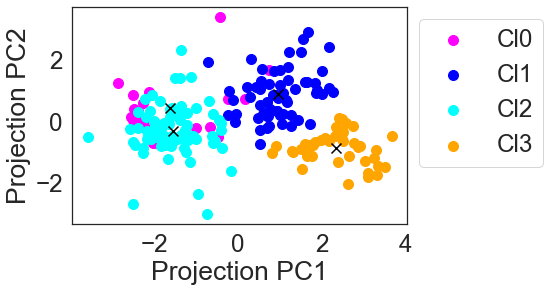

In [419]:
plt.scatter(projected_data[membership ==0,0], projected_data[membership == 0,1], s=100, c='magenta') 
plt.scatter(projected_data[membership ==1,0], projected_data[membership == 1,1], s=100, c='blue')
plt.scatter(projected_data[membership ==2,0], projected_data[membership == 2,1], s=100, c='cyan')
plt.scatter(projected_data[membership ==3,0], projected_data[membership == 3,1], s=100, c='orange')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',s=100, c='black')
plt.legend(["Cl0" , "Cl1","Cl2" , "Cl3"],bbox_to_anchor=(1.0, 1.0), loc='upper left')    
plt.xlabel('Projection PC1')
plt.ylabel('Projection PC2')

Text(0, 0.5, 'Projection PC3')

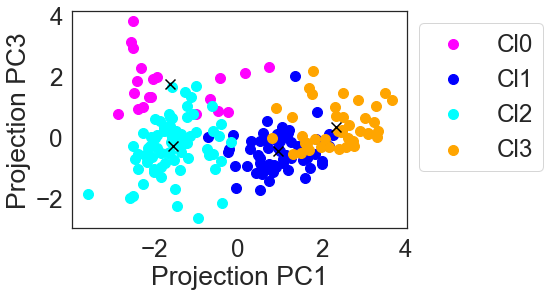

In [421]:
plt.scatter(projected_data[membership ==0,0], projected_data[membership == 0,2], s=100, c='magenta') 
plt.scatter(projected_data[membership ==1,0], projected_data[membership == 1,2], s=100, c='blue')
plt.scatter(projected_data[membership ==2,0], projected_data[membership == 2,2], s=100, c='cyan')
plt.scatter(projected_data[membership ==3,0], projected_data[membership == 3,2], s=100, c='orange')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],marker='x',s=100, c='black')
plt.legend(["Cl0" , "Cl1","Cl2" , "Cl3"],bbox_to_anchor=(1.0, 1.0), loc='upper left')    
plt.xlabel('Projection PC1')
plt.ylabel('Projection PC3')

In [336]:
N = len(membership)
percentage_list = []
nb_of_people_list = []
for i in range(n_clusters):
    percentage_list.append(100*(membership== i).sum()/N)
    nb_of_people_list.append((membership == i).sum())
    print("The cluster " + str(i) + " includes {:.2f}%".format(percentage_list[-1]),"of the days.")

The cluster 0 includes 9.95% of the days.
The cluster 1 includes 29.85% of the days.
The cluster 2 includes 39.30% of the days.
The cluster 3 includes 20.90% of the days.


In [340]:
for i in range(4):
    print(db[membership==i].shape) 

(20, 21)
(60, 21)
(79, 21)
(42, 21)


In [365]:
data0=db[membership==0]
data1=db[membership==1]
data2=db[membership==2]
data3=db[membership==3]

In [395]:
db['PC4cls'] = membership

In [418]:
# Grouping table by cluster label
PC4means = db.groupby('PC4cls')[cluster_variables].mean()
PC4means.T.round(3)

PC4cls,0,1,2,3
pct_white,0.217,0.664,0.115,0.791
pct_black,0.729,0.203,0.835,0.068
pct_no_schooling,0.021,0.003,0.005,0.003
pct_SNAP,0.401,0.480,0.358,0.362
median_age,35.705,34.245,33.773,43.117
median_hh_income,38861.250,72500.200,34786.759,133439.786


In [396]:
# Index db on cluster ID
tidy_db2 = db.set_index('PC4cls')
tidy_db2 = tidy_db2[cluster_variables]
tidy_db2 = tidy_db2.stack()
tidy_db2 = tidy_db2.reset_index()
tidy_db2 = tidy_db2.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
tidy_db2

,PC4cls,Attribute,Values
0,2,pct_white,0.036940
1,2,pct_black,0.932892
2,2,pct_no_schooling,0.002309
3,2,pct_SNAP,0.380483
4,2,median_age,28.300000
...,...,...,...
1201,3,pct_black,0.058972
1202,3,pct_no_schooling,0.000000
1203,3,pct_SNAP,0.365375
1204,3,median_age,41.500000


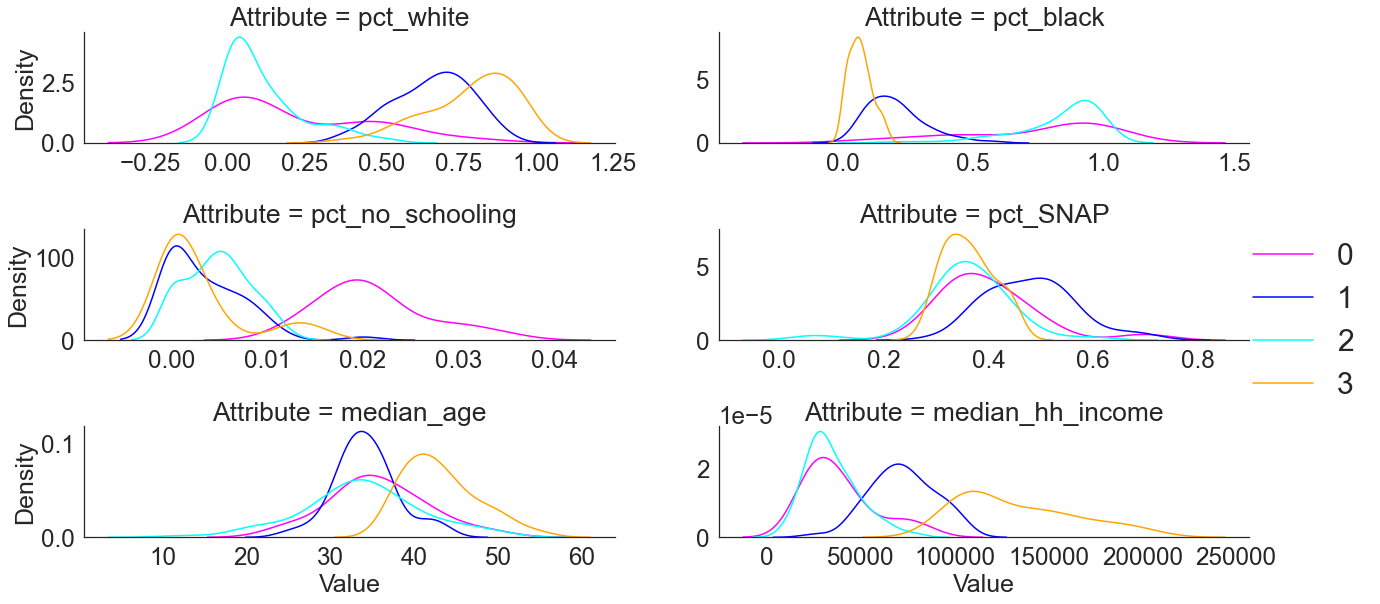

In [400]:
# Setup the facets
seaborn.set(font_scale=2.2) 
seaborn. set_style(style='white')
color = {0:"magenta", 1:"blue", 2:"cyan", 3:"orange"}
facets = seaborn.FacetGrid(data=tidy_db2, col='Attribute', palette=color, hue='PC4cls', \
                  sharey=False, sharex=False, aspect=3, col_wrap=2)
_ = facets.map(seaborn.kdeplot, 'Values', shade=False).add_legend(fontsize=30)
facets.legend.set_title(' ')
facets.set_axis_labels("Value","Density",fontsize=25)

/Users/marta/opt/anaconda3/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


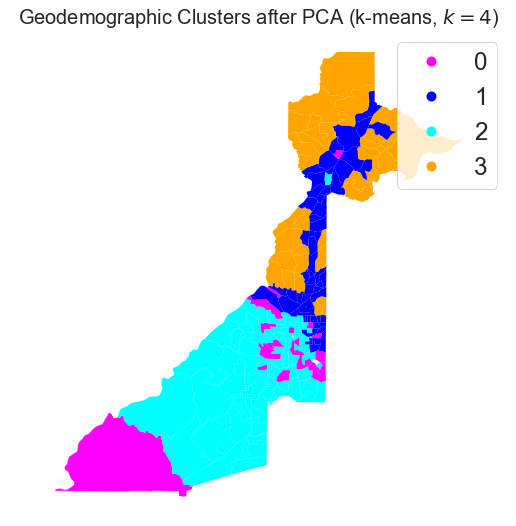

In [416]:
# Visualising clusters on the map

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cmapTrial = ListedColormap(["magenta", "blue", "cyan", "orange"])
f, ax = plt.subplots(1, figsize=(9, 9))
plt.title(r'Geodemographic Clusters after PCA (k-means, $k=4$)',fontsize=20)
db.plot(column='PC4cls', cmap=cmapTrial, categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.show()